In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import scipy.stats as stats
import os

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Inspect columns types for measurements table
inspector = inspect(engine)
columns_msrt = inspector.get_columns('measurement')
for column in columns_msrt:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Inspect columns type for station tables
columns_st = inspector.get_columns('station')
for column in columns_st:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Create our session (link) from Python to the DB
session = Session(bind = engine)

# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date_unpacked= last_date[0]
print(f"The Last Date Reported is {last_date_unpacked}")

The Last Date Reported is 2017-08-23


In [13]:
# Calculate the date 1 year ago from the last data point in the database
one_year_before_date = dt.datetime.strptime(last_date_unpacked, '%Y-%m-%d').date() - dt.timedelta(days = 365)
print( f" Date from one year ago is : {one_year_before_date}")

 Date from one year ago is : 2016-08-23


In [14]:
# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, Measurement.prcp]
measurement_data = session.query(*sel).filter(Measurement.date >= one_year_before_date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
measurement_df = pd.DataFrame(measurement_data, columns=['Date', 'Precipitation'])
measurement_df.set_index('Date', inplace=True, )
measurement_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [15]:
# Sort the dataframe by date
sorted_measurement_df= measurement_df.sort_index()
sorted_measurement_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


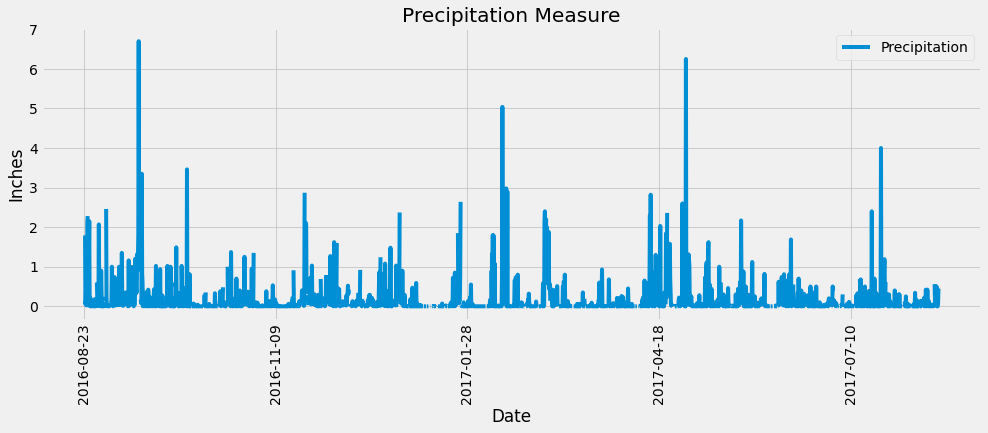

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = sorted_measurement_df.plot(rot=90, figsize = (15,5));
ax.set_title("Precipitation Measure");
ax.set_ylabel("Inches");



In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_measurement_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# Design a query to show how many stations are available in this dataset?
total_stations = session.query(Station.station).count()
print( f" There are {total_stations} stations in the Dataset")

 There are 9 stations in the Dataset


In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

sel = [Measurement.station, func.count(Measurement.station)]
most_active_stations = session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Station with the highest number of temperature observations.
most_active_st = most_active_stations[0][0]
most_active_st

'USC00519281'

In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

sel = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]

most_active_records = session.query(*sel).filter(Measurement.station == most_active_st).all()
most_active_records


[(54.0, 85.0, 71.66378066378067)]

In [22]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_most_active_st = session.query(Measurement.tobs).filter(Measurement.date >= one_year_before_date).\
                        filter(Measurement.station == most_active_st).all()
list_active_st_ly= list(np.ravel(last_year_most_active_st))
list_active_st_ly

[77.0,
 77.0,
 80.0,
 80.0,
 75.0,
 73.0,
 78.0,
 77.0,
 78.0,
 80.0,
 80.0,
 78.0,
 78.0,
 78.0,
 73.0,
 74.0,
 80.0,
 79.0,
 77.0,
 80.0,
 76.0,
 79.0,
 75.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 76.0,
 74.0,
 77.0,
 78.0,
 79.0,
 79.0,
 77.0,
 80.0,
 78.0,
 78.0,
 78.0,
 77.0,
 79.0,
 79.0,
 79.0,
 79.0,
 75.0,
 76.0,
 73.0,
 72.0,
 71.0,
 77.0,
 79.0,
 78.0,
 79.0,
 77.0,
 79.0,
 77.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 74.0,
 75.0,
 76.0,
 73.0,
 76.0,
 74.0,
 77.0,
 76.0,
 76.0,
 74.0,
 75.0,
 75.0,
 75.0,
 75.0,
 71.0,
 63.0,
 70.0,
 68.0,
 67.0,
 77.0,
 74.0,
 77.0,
 76.0,
 76.0,
 75.0,
 76.0,
 75.0,
 73.0,
 75.0,
 73.0,
 75.0,
 74.0,
 75.0,
 74.0,
 75.0,
 73.0,
 75.0,
 73.0,
 73.0,
 74.0,
 70.0,
 72.0,
 70.0,
 67.0,
 67.0,
 69.0,
 70.0,
 68.0,
 69.0,
 69.0,
 66.0,
 65.0,
 68.0,
 62.0,
 75.0,
 70.0,
 69.0,
 76.0,
 76.0,
 74.0,
 73.0,
 71.0,
 74.0,
 74.0,
 72.0,
 71.0,
 72.0,
 74.0,
 69.0,
 67.0,
 72.0,
 70.0,
 64.0,
 63.0,
 63.0,
 62.0,
 70.0,
 70.0,
 62.0,
 62.0,
 63.0,
 65.0,

Text(0, 0.5, 'Frecuency')

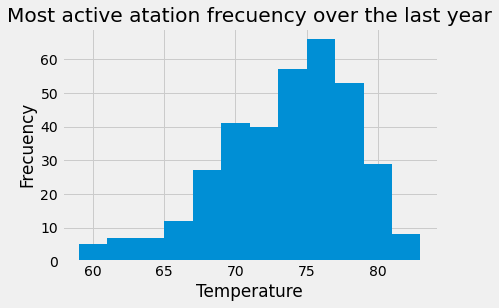

In [23]:
plt.hist(list_active_st_ly, bins=12)
plt.title("Most active atation frecuency over the last year")
plt.xlabel('Temperature')
plt.ylabel('Frecuency')

## Bonus Challenge Assignment

Temperature Analysis I

In [24]:

# Hawaii is reputed to enjoy mild weather all year. Is there a meaningful difference between the temperature in, for example, June and December?
# You may either use SQLAlchemy or pandas's read_csv() to perform this portion.

data_file = os.path.join("Resources","hawaii_measurements.csv")
hawaii_df = pd.read_csv(data_file)
hawaii_df["date"]= pd.to_datetime(hawaii_df["date"])
hawaii_df

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73
...,...,...,...,...
19545,USC00516128,2017-08-19,0.09,71
19546,USC00516128,2017-08-20,NaN,78
19547,USC00516128,2017-08-21,0.56,76
19548,USC00516128,2017-08-22,0.50,76


In [25]:
# Identify the average temperature in June at all stations across all available years in the dataset.
date_str_june = "06"
hawaii_filtered_june = hawaii_df.loc[hawaii_df["date"].dt.strftime("%m") == date_str_june ]
hawaii_filtered_avg_june = hawaii_filtered_june["tobs"].mean()
print( F" The average temperature in Hawaii across all stations during June is {round(hawaii_filtered_avg_june,0)}")

 The average temperature in Hawaii across all stations during June is 75.0


In [26]:
# Identify the average temperature in December at all stations across all available years in the dataset.
date_str_dec = "12"
hawaii_filtered_dec = hawaii_df.loc[hawaii_df["date"].dt.strftime("%m") == date_str_dec ]
hawaii_filtered_avg_dec = hawaii_filtered_dec["tobs"].mean()
print( F" The average temperature in Hawaii across all stations during December is {round(hawaii_filtered_avg_dec,0)}")

 The average temperature in Hawaii across all stations during December is 71.0


In [27]:
stats.ttest_ind(hawaii_filtered_june["tobs"], hawaii_filtered_dec["tobs"])

Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

Temperature Analysis II

In [50]:
start_vacation_date = "2018-05-14"

last_year_start_date = dt.datetime.strptime(start_vacation_date, '%Y-%m-%d').date() - dt.timedelta(days = 365)
last_year_end_date = (last_year_start_date + dt.timedelta(days = 14))
print(f" Last year, vacations were from {last_year_start_date} to {last_year_end_date}")


 Last year, vacations were from 2017-05-14 to 2017-05-28


In [51]:
ly_start_date = last_year_start_date.strftime("%Y-%m-%d")
ly_end_date =  last_year_end_date.strftime("%Y-%m-%d")
ly_end_date

'2017-05-28'

In [52]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [53]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
tmin, tavg, tmax = calc_temps(ly_start_date, ly_end_date)[0]
print(tmin, tavg, tmax)

68.0 74.88235294117646 87.0


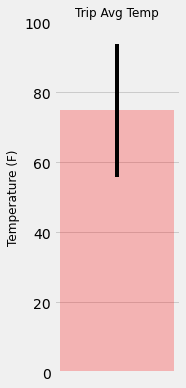

In [54]:
# Plot the results from your previous query as a bar chart.
yerr = tmax - tmin
fig, ax = plt.subplots(figsize=(2,6))
ax.bar(1,tavg,width = 0.2, color = "r", yerr = yerr, alpha = 0.25)
ax.xaxis.set_visible(False)
plt.title("Trip Avg Temp", fontsize = 12)
plt.ylabel("Temperature (F)", fontsize = 12)
plt.ylim(0,100)
plt.show()

# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

In [55]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rainfall_sel = [Station.station, Station.name, func.sum(Measurement.prcp), Station.latitude, Station.longitude, Station.elevation]
ly_rainfall_per_station = session.query(*rainfall_sel).group_by(Measurement.station).\
                        filter(Measurement.station==Station.station).filter(Measurement.date >= last_year_start_date).\
                        filter(Measurement.date <= last_year_end_date).order_by(func.sum(Measurement.prcp).desc()).all()
ly_rainfall_per_station

[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  6.25,
  21.3331,
  -157.8025,
  152.4),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  1.68,
  21.33556,
  -157.71139,
  19.5),
 ('USC00513117', 'KANEOHE 838.1, HI US', 1.57, 21.4234, -157.8015, 14.6),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  1.2300000000000002,
  21.45167,
  -157.84888999999998,
  32.9),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  0.53,
  21.5213,
  -157.8374,
  7.0),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  0.4600000000000001,
  21.2716,
  -157.8168,
  3.0)]

In [56]:
rainfall_amount_df= pd.DataFrame(ly_rainfall_per_station,
             columns=["Station","Station Name", "Rainfall Amount", "Latitude", "Longitude", "Elevation"]
            ).sort_values("Rainfall Amount",ascending=False)
rainfall_amount_df

,Station,Station Name,Rainfall Amount,Latitude,Longitude,Elevation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",6.25,21.33310,-157.80250,152.4
1,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",1.68,21.33556,-157.71139,19.5
2,USC00513117,"KANEOHE 838.1, HI US",1.57,21.42340,-157.80150,14.6
3,USC00519281,"WAIHEE 837.5, HI US",1.23,21.45167,-157.84889,32.9
4,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",0.53,21.52130,-157.83740,7.0
5,USC00519397,"WAIKIKI 717.2, HI US",0.46,21.27160,-157.81680,3.0


In [83]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [84]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_trip_date = last_year_start_date.strftime("%m-%d")
end_trip_date = last_year_end_date.strftime("%m-%d")

print(f" Vacation days are from {start_trip_date} to {end_trip_date}")


 Vacation days are from 05-14 to 05-28


In [106]:
# Use the start and end date to create a range of dates
numdays = 15
date_list = [(last_year_end_date)- dt.timedelta(days=x) for x in range(numdays)]

# Stip off the year and save a list of %m-%d strings
trip_dates = []
for date in date_list:
    trip_dates.append(date.strftime("%m-%d"))
trip_dates

['05-28',
 '05-27',
 '05-26',
 '05-25',
 '05-24',
 '05-23',
 '05-22',
 '05-21',
 '05-20',
 '05-19',
 '05-18',
 '05-17',
 '05-16',
 '05-15',
 '05-14']

In [137]:
# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for trip_date in trip_dates:
    trip_results = daily_normals(trip_date)
    normals.append(trip_results[0])
results_list

[(67.0, 74.27777777777777, 82.0),
 (65.0, 74.49090909090908, 80.0),
 (65.0, 74.03636363636363, 82.0),
 (68.0, 74.27586206896552, 79.0),
 (67.0, 73.94827586206897, 79.0),
 (68.0, 74.94827586206897, 87.0),
 (64.0, 74.45614035087719, 80.0),
 (64.0, 72.96428571428571, 80.0),
 (68.0, 73.89655172413794, 79.0),
 (65.0, 73.80701754385964, 79.0),
 (68.0, 74.10714285714286, 82.0),
 (68.0, 74.45, 79.0),
 (68.0, 74.37931034482759, 80.0),
 (63.0, 73.69090909090909, 79.0),
 (63.0, 73.89285714285714, 80.0)]

In [138]:
dates = pd.Series(trip_dates)
dates

0     05-28
1     05-27
2     05-26
3     05-25
4     05-24
5     05-23
6     05-22
7     05-21
8     05-20
9     05-19
10    05-18
11    05-17
12    05-16
13    05-15
14    05-14
dtype: object

In [139]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_df = pd.DataFrame(normals, columns = ["Tmin", "Tavg", "Tmax"])

trip_df_final= pd.concat([dates, pd.DataFrame(trip_df)], axis=1)
trip_df_renamed = trip_df_final.rename(columns = {0: "Dates"})
vacation_df = trip_df_renamed.set_index("Dates")
vacation_df

,Tmin,Tavg,Tmax
Dates,,,
05-28,67.0,74.277778,82.0
05-27,65.0,74.490909,80.0
05-26,65.0,74.036364,82.0
05-25,68.0,74.275862,79.0
05-24,67.0,73.948276,79.0
05-23,68.0,74.948276,87.0
05-22,64.0,74.456140,80.0
05-21,64.0,72.964286,80.0
05-20,68.0,73.896552,79.0


Text(0.5, 1.0, 'Daily normals from 05-14 to 05-28')

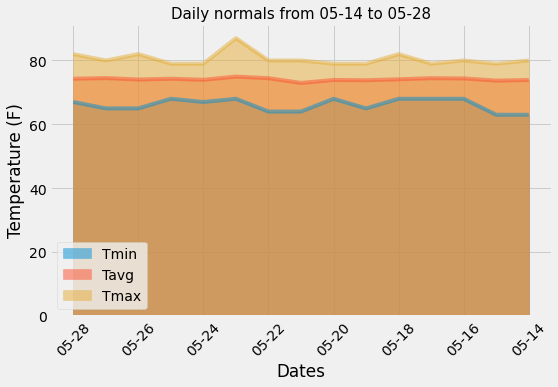

In [147]:
# Plot the daily normals as an area plot with `stacked=False`
vacation_df.plot.area(stacked = False, figsize = (8,5), rot = 45)
plt.ylabel("Temperature (F)")
plt.legend(loc = "best")
plt.title(f"Daily normals from {start_trip_date} to {end_trip_date}", fontsize = 15)